In [1]:
'''
---------------------------------------------------------------
Simulation for Function-on-Function Linear Regression
---------------------------------------------------------------
* 1 d

* 1 Response Y & 3 Predictor (X1, X2, X3)   

* Regular Dense Grid (num of grid: 31)

* Training samp size: 2000
  Test     samp size: 1000

* Using Gaussian Kernal Function in LPR

* Using Leave-One-Curve-Out CV for bandwidth selection in LPR 
---------------------------------------------------------------
'''

#####

import GetData
import FFReg
import Plotting
import lpr

###
import numpy as np

In [2]:
# ---------
# Settings
# ---------
# sim_rep_time = 500

tran_samp_size = 2000
test_samp_size = 1000
samp_size = tran_samp_size + test_samp_size

range_num_pts = np.array([4, 6])
num_pts = range_num_pts[1]

In [3]:
# -------------
# Setting of X1
# -------------
def X1_Mean_Func(s):
    #input, output: vector
    return(s /  + 2 * np.sin(s))


def Eigen_Funcs_X1(s):
    #input  :d-vector
    #output:array with dim (2 * d)
    return(np.array([np.sqrt(2 / 5) * -np.cos(2 * np.pi * s / 5), 
                     np.sqrt(2 / 5) *  np.sin(2 * np.pi * s / 5)]))

num_grid_X1 = 21
range_X1 = np.array([0, 5])
X1_eigen_val = np.array([9, 4])


In [4]:
# -------------
# Setting of X2
# -------------
def X2_Mean_Func(s):
    #input, output: vector
    return(s / 5 + np.cos(1.5 * s))

def Eigen_Funcs_X2(s):
    #input  :d-vector
    #output:array with dim (2 * d) 
    return(np.array([-np.sqrt(2 / 10) * np.cos(4 * np.pi * s / 10), 
                     np.sqrt(2 / 10) *  np.sin(4 * np.pi * s / 10)]))

num_grid_X2 = 21

range_X2 = np.array([0, 10])

X2_eigen_val = np.array([12, 8])

In [5]:
# -------------
# Setting of X3
# -------------
def X3_Mean_Func(s):
    #input, output: vector
    return(np.sqrt(s) + np.cos(s))

def Eigen_Funcs_X3(s):
    #input  :d-vector
    #output:array with dim (2 * d) 
    return(np.array([-np.sqrt(2 / 10) * np.cos(np.pi * s / 10), 
                      np.sqrt(2 / 10) * np.sin(np.pi * s / 10)]))

num_grid_X3 = 21

range_X3 = np.array([0, 10])

X3_eigen_val = np.array([6, 4])

In [6]:
# -------------
# Setting of Y
# -------------

def Y_Mean_Func(s):
    #input, output: vector
    return(s / 2 + np.sin(s))

def Eigen_Funcs_Y(s):
    #input  :d-vector
    #output:array with dim (2 * d)
    return(np.array([np.sqrt(2 / 5) * -np.cos(np.pi * s / 5), 
                     np.sqrt(2 / 5) * np.sin(np.pi * s / 5)])) 

num_grid_Y = 21

range_Y = np.array([0, 5])

B_1 = np.array([[1, 0.8], [-1, 0.5]])
B_2 = np.array([[1, 1.5], [1.2, 0.5]])
B_3 = np.array([[0.6, 1.5], [-1.2, 1]])

In [7]:
#Generate Simulation data of Xs

np.random.seed(104)
X1_data = GetData.Get_X_data(Mean_Func  = X1_Mean_Func, 
                             Eigen_Funcs = Eigen_Funcs_X1, 
                             eigen_val  = X1_eigen_val, 
                             domain = range_X1, 
                             tran_size  = tran_samp_size, 
                             test_size  = test_samp_size,
                             num_grid = num_grid_X1,
                             num_pts = range_num_pts,
                             sparse = True)

In [8]:
X2_data = GetData.Get_X_data(Mean_Func  = X2_Mean_Func, 
                             Eigen_Funcs = Eigen_Funcs_X2, 
                             eigen_val  = X2_eigen_val, 
                             domain = range_X2, 
                             tran_size  = tran_samp_size, 
                             test_size  = test_samp_size,
                             num_grid = num_grid_X2,
                             num_pts = range_num_pts,
                             sparse = True)

In [9]:
X3_data = GetData.Get_X_data(Mean_Func  = X3_Mean_Func, 
                             Eigen_Funcs = Eigen_Funcs_X3, 
                             eigen_val  = X3_eigen_val, 
                             domain = range_X3, 
                             tran_size  = tran_samp_size, 
                             test_size  = test_samp_size,
                             num_grid = num_grid_X3, 
                             num_pts = range_num_pts,
                             sparse = True)

In [10]:
#Generate Simulation data of Y

Y_data = GetData.Get_Y_data(Mean_Func = Y_Mean_Func, 
                            Eigen_Funcs = Eigen_Funcs_Y,
                            X_fpcs = (X1_data.fpcs, X2_data.fpcs, X3_data.fpcs),
                            B = (B_1, B_2, B_3), 
                            domain = range_Y, 
                            test_size = test_samp_size, 
                            num_grid = num_grid_Y, 
                            num_pts = range_num_pts,
                             sparse = True)

In [11]:
'''
Results of X1
'''

'\nResults of X1\n'

In [12]:
# bw for X1
X1_candidate_h_mean = np.arange(0.15, 1, 0.05).reshape(-1, 1)
X1_candidate_h_cov = np.arange(0.1, 0.5, 0.05).repeat(2).reshape(-1, 2)
X1_candidate_h_diag_cov = np.arange(0.1, 0.8, 0.05).reshape(-1, 1)


In [13]:

#------------------------
# Get FPCA result of X1
#------------------------

result_X1 = FFReg.Get_FPCA_Result(X1_data, X1_candidate_h_mean, 
                                  X1_candidate_h_cov, X1_candidate_h_diag_cov, 
                                  ker_fun = "Gaussian")
print(result_X1)

C:\Users\USER\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:155: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2407: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2408: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


Number of grid: 21
Number of random function: 2000
Eigen pairs: 3
Sigma2: 0.185023
Bandwidth of mean: [0.25]
Bandwidth of cov: [0.25, 0.25]
Bandwidth of cov_diag: [0.25]


In [14]:
result_X1.mean_fun

array([-0.03086799, -0.03209971,  0.04539428,  0.19033786,  0.38231574,
        0.6066113 ,  0.79569567,  0.91127723,  0.96026429,  0.91948152,
        0.76335456,  0.52536042,  0.23531392, -0.12208942, -0.53640217,
       -0.9957794 , -1.45821934, -1.86209616, -2.17927566, -2.36533607,
       -2.4135045 ])

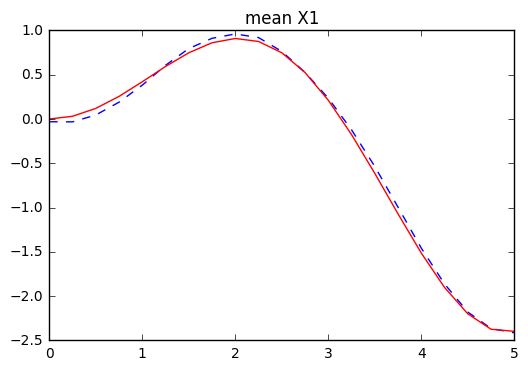

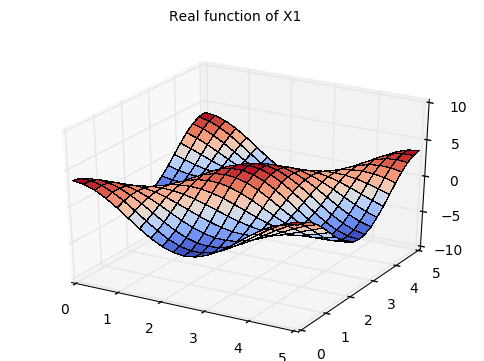

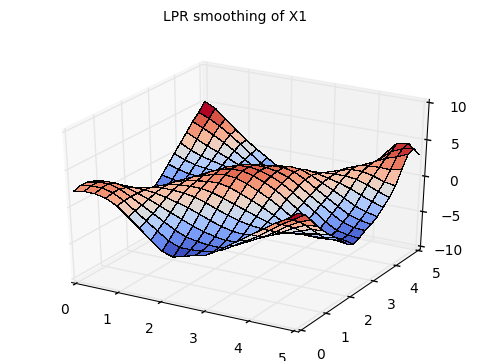

1.04880884817
1.0


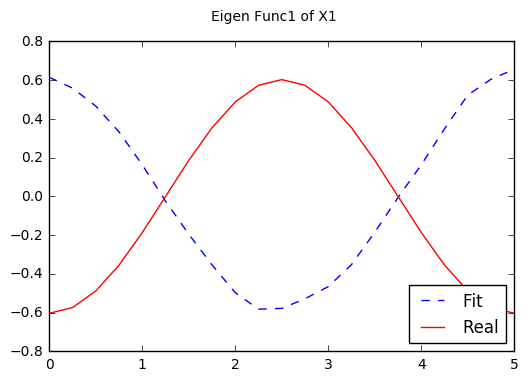

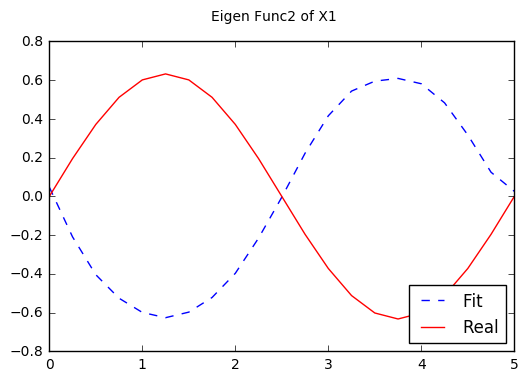

In [15]:
#------------------------
# Plot FPCA result of X1
#------------------------

Plotting.Plot_FPCAResult(X1_data, 
                         FpcaResult_X = result_X1, 
                         Mean_Func = X1_Mean_Func, 
                         Eigen_Funcs = Eigen_Funcs_X1, 
                          X_eigen_val = X1_eigen_val,
                          adjust_sign_of_eigen = - np.array([1, 1]), 
                          name_of_X = 'X1', 
                          z_lim_of_cov = np.array([-10, 10]))

In [16]:
#fitting test sample
fit_test_X1 =result_X1.Restruect_Fun(X1_data.test_time_pts.reshape(test_samp_size, num_pts, 1),
                                     X1_data.obs_test)[1]

fit_train_X1 =result_X1.Restruect_Fun(X1_data.tran_time_pts.reshape(tran_samp_size, num_pts, 1),
                                     X1_data.obs_tran)[1]

C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2407: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2408: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


In [17]:
'''
Results of X2
'''

'\nResults of X2\n'

In [18]:
X2_candidate_h_mean = np.arange(0.3, 2, 0.05).reshape(-1, 1)
X2_candidate_h_cov = np.arange(0.2, 1.5, 0.1).repeat(2).reshape(-1, 2)
X2_candidate_h_diag_cov =  np.arange(0.2, 1.6, 0.1).reshape(-1, 1)

In [19]:
#------------------------
# Get FPCA result of X2
#------------------------
result_X2 = FFReg.Get_FPCA_Result(X2_data, X2_candidate_h_mean, 
                                  X2_candidate_h_cov, X2_candidate_h_diag_cov,
                                  ker_fun = "Gaussian")
print(result_X2)

C:\Users\USER\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:155: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2407: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2408: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


Number of grid: 21
Number of random function: 2000
Eigen pairs: 3
Sigma2: 0.646595
Bandwidth of mean: [0.55]
Bandwidth of cov: [0.5, 0.5]
Bandwidth of cov_diag: [0.5]


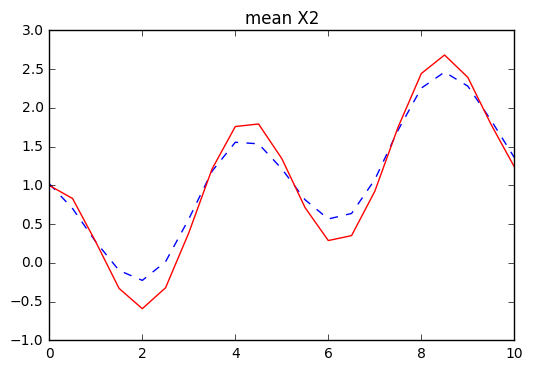

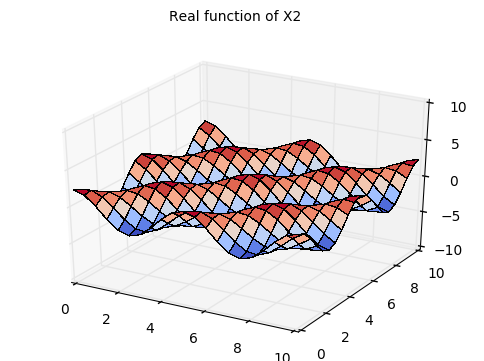

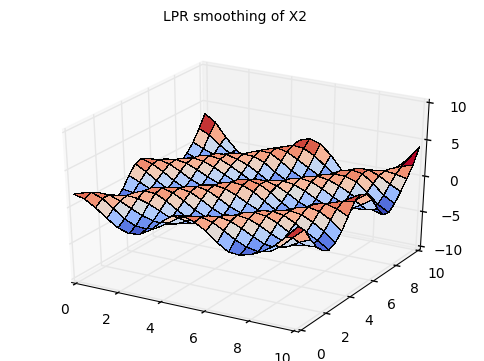

1.04880884817
1.0


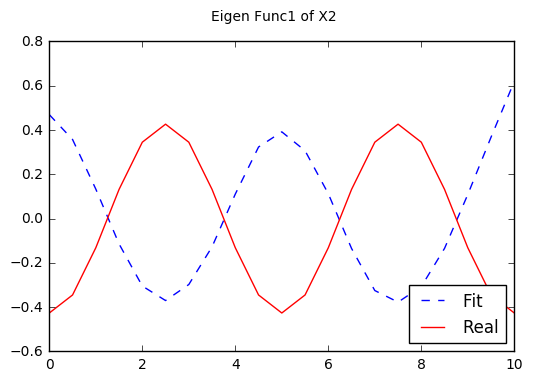

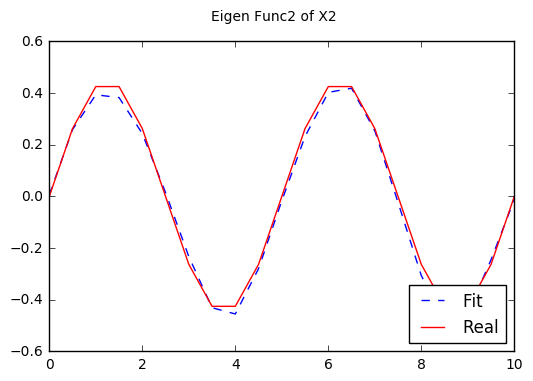

In [20]:
#------------------------
# Plot FPCA result of X2
#------------------------
Plotting.Plot_FPCAResult(X2_data, 
                         FpcaResult_X = result_X2, 
                         Mean_Func = X2_Mean_Func, 
                         Eigen_Funcs = Eigen_Funcs_X2, 
                          X_eigen_val = X2_eigen_val,
                          adjust_sign_of_eigen = np.array([-1, 1]), 
                          name_of_X = 'X2', 
                          z_lim_of_cov = np.array([-10, 10]))

In [21]:
fit_test_X2 =result_X2.Restruect_Fun(X2_data.test_time_pts.reshape(test_samp_size, num_pts, 1),
                                     X2_data.obs_test)[1]


fit_train_X2 =result_X2.Restruect_Fun(X2_data.tran_time_pts.reshape(tran_samp_size, num_pts, 1),
                                     X2_data.obs_tran)[1]

C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2407: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2408: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


In [22]:
'''
Results of X3
'''

'\nResults of X3\n'

In [23]:
X3_candidate_h_mean = np.arange(0.3, 2, 0.05).reshape(-1, 1)
X3_candidate_h_cov = np.arange(0.1, 1.5, 0.1).repeat(2).reshape(-1, 2)
X3_candidate_h_diag_cov =  np.arange(0.1, 1.6, 0.1).reshape(-1, 1)

In [24]:
#------------------------
# Get FPCA result of X3
#------------------------

result_X3 = FFReg.Get_FPCA_Result(X3_data, X3_candidate_h_mean, 
                                  X3_candidate_h_cov, X3_candidate_h_diag_cov, ker_fun = "Gaussian")
print(result_X3)

C:\Users\USER\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:155: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2407: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2408: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


Number of grid: 21
Number of random function: 2000
Eigen pairs: 3
Sigma2: 0.168448
Bandwidth of mean: [0.55]
Bandwidth of cov: [0.5, 0.5]
Bandwidth of cov_diag: [0.5]


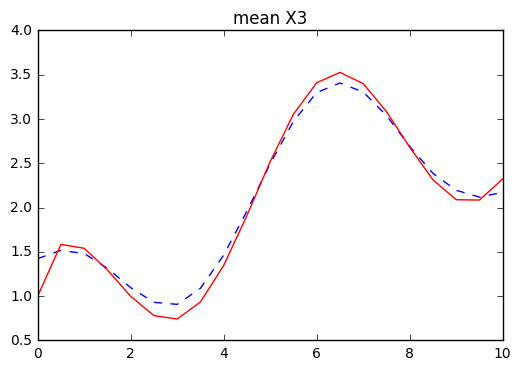

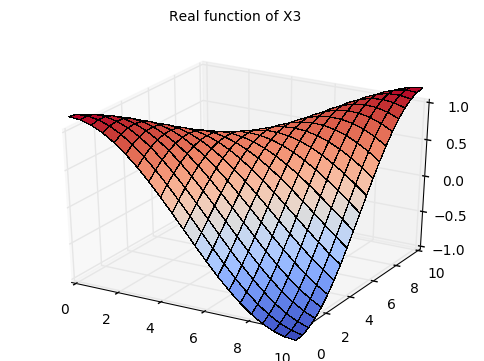

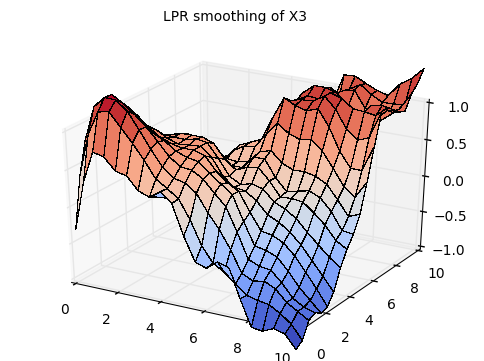

1.04880884817
1.0


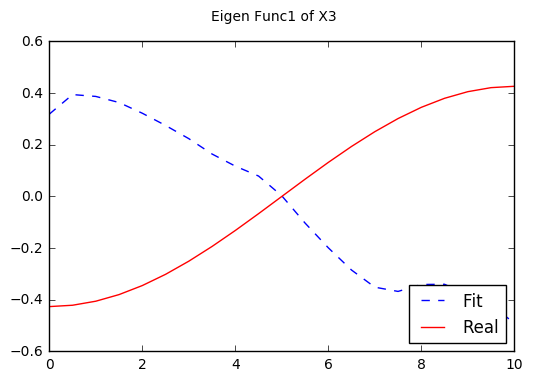

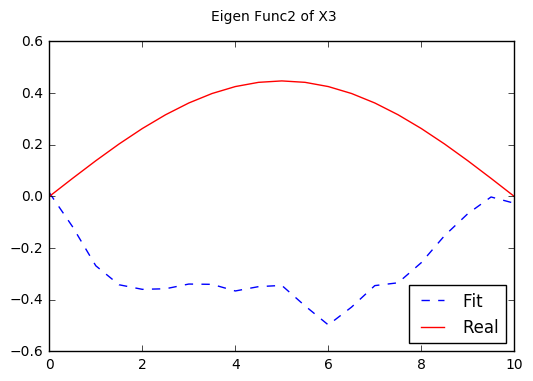

In [25]:
#------------------------
# Plot FPCA result of X3
#------------------------

Plotting.Plot_FPCAResult(X3_data, 
                         FpcaResult_X = result_X3, 
                         Mean_Func = X3_Mean_Func, 
                         Eigen_Funcs = Eigen_Funcs_X3, 
                          X_eigen_val = X3_eigen_val,
                          adjust_sign_of_eigen = -np.array([1, -1]), 
                          name_of_X = 'X3', 
                          z_lim_of_cov = np.array([-1, 1]))

In [26]:
fit_test_X3 =result_X3.Restruect_Fun(X3_data.test_time_pts.reshape(test_samp_size, num_pts, 1),
                                     X3_data.obs_test)[1]

fit_train_X3 =result_X3.Restruect_Fun(X3_data.tran_time_pts.reshape(tran_samp_size, num_pts, 1),
                                     X3_data.obs_tran)[1]

C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2407: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2408: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


In [27]:
'''
Results of Y
'''

'\nResults of Y\n'

In [28]:
Y_candidate_h_mean = np.arange(0.15, 0.5, 0.05).reshape(-1, 1)
Y_candidate_h_cov = np.arange(0.1, 0.5, 0.05).repeat(2).reshape(-1, 2)

In [29]:
#------------------------
# Get FPCA result of Y
#------------------------
result_Y = FFReg.Fit_Mean_and_Cov(Y_data, Y_candidate_h_mean, 
                                  Y_candidate_h_cov, ker_fun = "Gaussian")
print(result_Y)

C:\Users\USER\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:155: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2407: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2408: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


Number of grid: 21
Number of random function: 2000
Bandwidth of mean: [0.25]
Bandwidth of cov: [0.45, 0.45]


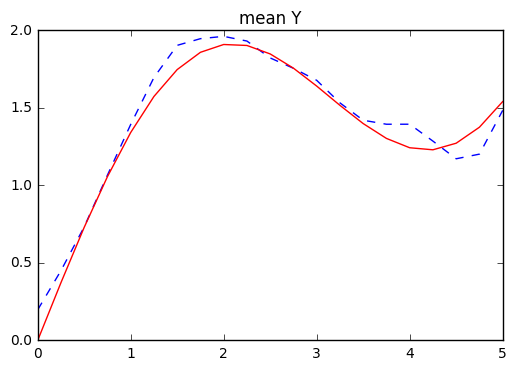

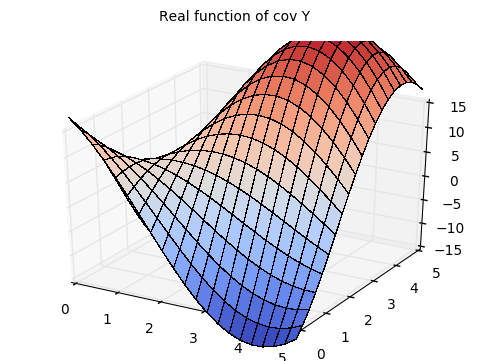

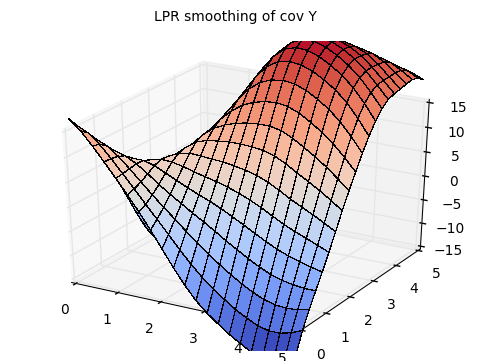

In [30]:
#------------------------
# Plot FPCA result of Y
#------------------------

Plotting.Plot_FPCAResult(Y_data, 
                         FpcaResult_X = result_Y, 
                         Mean_Func = Y_Mean_Func, 
                         Eigen_Funcs = Eigen_Funcs_Y, 
                         X_eigen_val = None,
                         adjust_sign_of_eigen = None, 
                         name_of_X = 'Y', 
                         z_lim_of_cov = np.array([-15, 15]),
                         response = True)

In [31]:
'''
Construct Coefficient Function

    1. fit cov_Xi_Xj
    2. fit cov_Xi_Y
    3. combine them to build coefficient function
    
'''

'\nConstruct Coefficient Function\n\n    1. fit cov_Xi_Xj\n    2. fit cov_Xi_Y\n    3. combine them to build coefficient function\n    \n'

In [32]:
# bandwidth
X1_Y_candidate_h_cov = np.asanyarray(np.meshgrid(np.linspace(0.1, 0.4, 4), 
                                                 np.linspace(0.1, 0.4, 4))).T.reshape(-1,2)

In [33]:
fit_cov_X1_Y = FFReg.Fit_Cov_XY(X_time_pts = X1_data.tran_time_pts,
                                Y_time_pts = Y_data.tran_time_pts,
                                obs_X = X1_data.obs_tran, 
                                obs_Y = Y_data.obs_tran,
                                X_time_grid = X1_data.time_grid,
                                Y_time_grid = Y_data.time_grid, 
                                fit_X_mean = result_X1.mean_fun, 
                                fit_Y_mean = result_Y.mean_fun, 
                                candidate_h_cov = X1_Y_candidate_h_cov, 
                                ker_fun = "Gaussian")

C:\Users\USER\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:155: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2407: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2408: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


Bandwidth of cov:  [ 0.3  0.3]


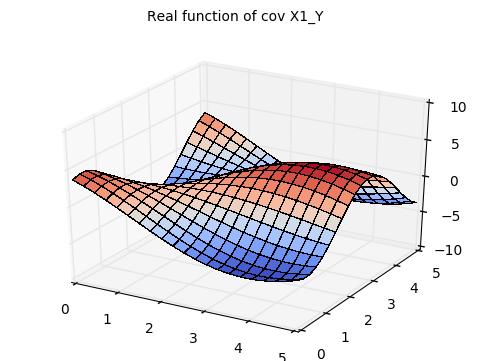

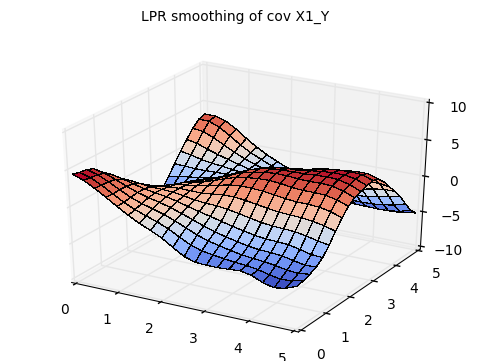

In [34]:
Plotting.Plot_Cov_XY(time_grid_X = X1_data.time_grid,
                     time_grid_Y = Y_data.time_grid,
                     X_real_val_on_grid = X1_data.real_val_on_grid,
                     Y_real_val_on_grid = Y_data.real_val_on_grid,
                     X_mean = X1_Mean_Func(X1_data.time_grid), 
                     Y_mean = Y_Mean_Func(Y_data.time_grid),
                     fitted_cov = fit_cov_X1_Y, 
                     name_of_XY = 'X1_Y', 
                     z_lim = np.array([-10, 10]))

In [35]:
# bandwidth
X2_Y_candidate_h_cov = np.asanyarray(np.meshgrid(np.linspace(0.4, 0.8, 4), 
                                                 np.linspace(0.1, 0.3, 3))).T.reshape(-1,2)

In [36]:
# fit Cov
fit_cov_X2_Y = FFReg.Fit_Cov_XY(X_time_pts = X2_data.tran_time_pts,
                                Y_time_pts = Y_data.tran_time_pts,
                                obs_X = X2_data.obs_tran, 
                                obs_Y = Y_data.obs_tran,
                                X_time_grid = X2_data.time_grid,
                                Y_time_grid = Y_data.time_grid,
                                fit_X_mean = result_X2.mean_fun,
                                fit_Y_mean = result_Y.mean_fun,
                                candidate_h_cov = X2_Y_candidate_h_cov, 
                                ker_fun = "Gaussian")

C:\Users\USER\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:155: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2407: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2408: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


Bandwidth of cov:  [ 0.53333333  0.3       ]


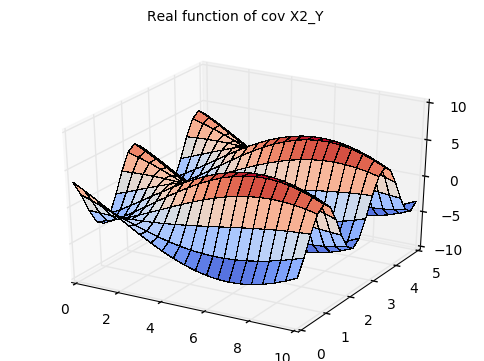

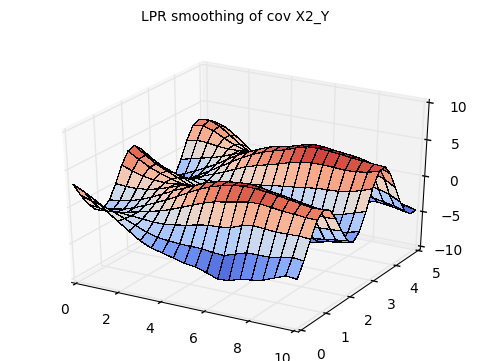

In [37]:
Plotting.Plot_Cov_XY(time_grid_X = X2_data.time_grid,
                     time_grid_Y = Y_data.time_grid,
                     X_real_val_on_grid = X2_data.real_val_on_grid,
                     Y_real_val_on_grid = Y_data.real_val_on_grid,
                     X_mean = X2_Mean_Func(X2_data.time_grid), 
                     Y_mean = Y_Mean_Func(Y_data.time_grid),
                     fitted_cov = fit_cov_X2_Y, 
                     name_of_XY = 'X2_Y', 
                     z_lim = np.array([-10, 10]))

In [38]:
X3_Y_candidate_h_cov = np.asanyarray(np.meshgrid(np.linspace(0.3, 0.7, 3), 
                                                np.linspace(0.1, 0.4, 4))).T.reshape(-1,2)

In [39]:
fit_cov_X3_Y = FFReg.Fit_Cov_XY(X_time_pts = X3_data.tran_time_pts,
                                Y_time_pts = Y_data.tran_time_pts,
                                obs_X = X3_data.obs_tran, 
                                obs_Y = Y_data.obs_tran,
                                X_time_grid = X3_data.time_grid,
                                Y_time_grid = Y_data.time_grid,
                                fit_X_mean = result_X3.mean_fun,
                                fit_Y_mean = result_Y.mean_fun,
                                candidate_h_cov = X3_Y_candidate_h_cov, 
                                ker_fun = "Gaussian")

C:\Users\USER\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:155: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2407: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2408: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


Bandwidth of cov:  [ 0.7  0.3]


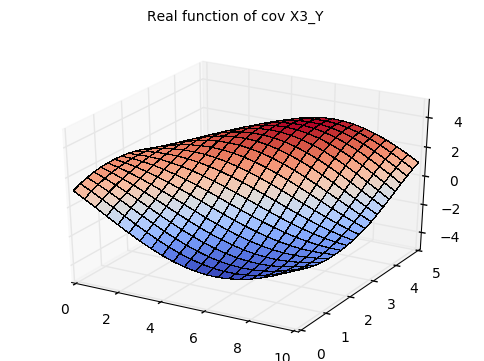

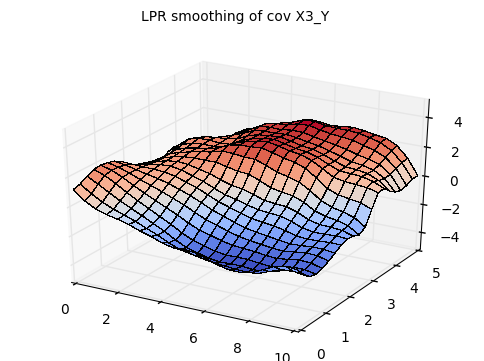

In [40]:
Plotting.Plot_Cov_XY(time_grid_X = X3_data.time_grid,
                     time_grid_Y = Y_data.time_grid,
                     X_real_val_on_grid = X3_data.real_val_on_grid,
                     Y_real_val_on_grid = Y_data.real_val_on_grid,
                     X_mean = X3_Mean_Func(X3_data.time_grid), 
                     Y_mean = Y_Mean_Func(Y_data.time_grid),
                     fitted_cov = fit_cov_X3_Y, 
                     name_of_XY = 'X3_Y', 
                     z_lim = np.array([-5, 5]))

In [41]:
X1_X2_candidate_h_cov = np.asanyarray(np.meshgrid(np.linspace(0.1, 0.6, 6), 
                                                np.linspace(0.3, 0.8, 6))).T.reshape(-1,2)

In [42]:
fit_cov_X1_X2 = FFReg.Fit_Cov_XY(X_time_pts = X1_data.tran_time_pts,
                                 Y_time_pts = X2_data.tran_time_pts,
                                 obs_X = X1_data.obs_tran,
                                 obs_Y = X2_data.obs_tran,
                                 X_time_grid = X1_data.time_grid,
                                 Y_time_grid = X2_data.time_grid,
                                 fit_X_mean = result_X1.mean_fun,
                                 fit_Y_mean = result_X2.mean_fun,
                                 candidate_h_cov = X1_X2_candidate_h_cov, 
                                 ker_fun = "Gaussian")

C:\Users\USER\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:155: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2407: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2408: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


Bandwidth of cov:  [ 0.3  0.5]


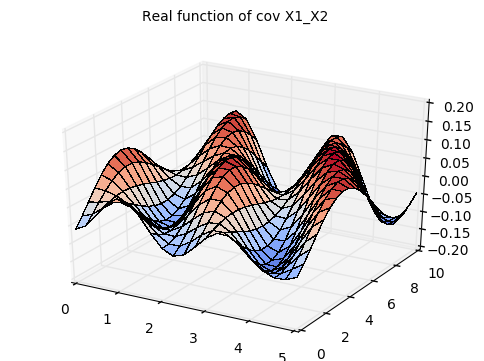

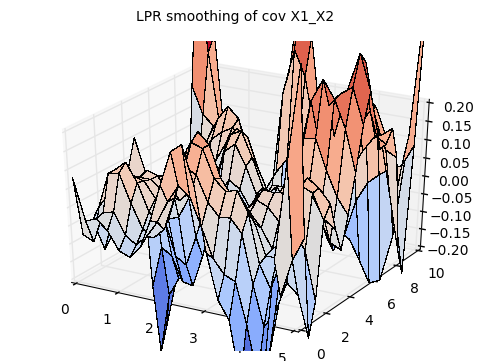

In [43]:
Plotting.Plot_Cov_XY(time_grid_X = X1_data.time_grid,
                     time_grid_Y = X2_data.time_grid,
                     X_real_val_on_grid = X1_data.real_val_on_grid,
                     Y_real_val_on_grid = X2_data.real_val_on_grid,
                     X_mean = X1_Mean_Func(X1_data.time_grid), 
                     Y_mean = X2_Mean_Func(X2_data.time_grid), 
                     fitted_cov = fit_cov_X1_X2,
                     name_of_XY = 'X1_X2', 
                     z_lim = np.array([-0.2, 0.2]))


In [44]:
X1_X3_candidate_h_cov = np.asanyarray(np.meshgrid(np.linspace(0.2, 0.7, 6), 
                                                np.linspace(0.3, 1, 8))).T.reshape(-1,2)

In [45]:
fit_cov_X1_X3 = FFReg.Fit_Cov_XY(X_time_pts = X1_data.tran_time_pts,
                                 Y_time_pts = X3_data.tran_time_pts,
                                 obs_X = X1_data.obs_tran,
                                 obs_Y = X3_data.obs_tran,
                                 X_time_grid = X1_data.time_grid,
                                 Y_time_grid = X3_data.time_grid,
                                 fit_X_mean = result_X1.mean_fun, 
                                 fit_Y_mean = result_X3.mean_fun, 
                                 candidate_h_cov = X1_X3_candidate_h_cov, 
                                 ker_fun = "Gaussian")

C:\Users\USER\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:155: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2407: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2408: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


Bandwidth of cov:  [ 0.3  0.5]


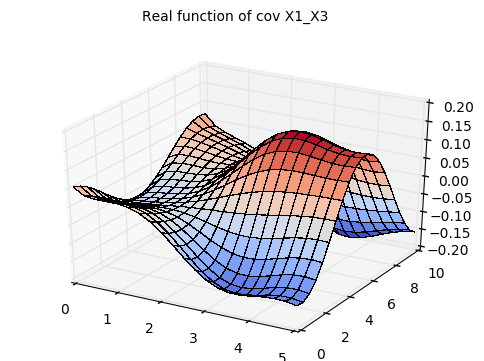

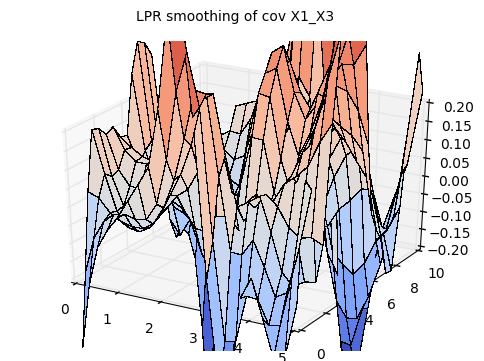

In [46]:
Plotting.Plot_Cov_XY(time_grid_X = X1_data.time_grid,
                     time_grid_Y = X3_data.time_grid,
                     X_real_val_on_grid = X1_data.real_val_on_grid,
                     Y_real_val_on_grid = X3_data.real_val_on_grid,
                     X_mean = X1_Mean_Func(X1_data.time_grid), 
                     Y_mean = X3_Mean_Func(X3_data.time_grid),                     
                     fitted_cov = fit_cov_X1_X3, 
                     name_of_XY = 'X1_X3', 
                     z_lim = np.array([-0.2, 0.2]))

In [47]:
X2_X3_candidate_h_cov = np.asanyarray(np.meshgrid(np.linspace(0.2, 0.7, 6), 
                                                np.linspace(0.3, 0.7, 5))).T.reshape(-1,2)

In [48]:
fit_cov_X2_X3 = FFReg.Fit_Cov_XY(X_time_pts = X2_data.tran_time_pts,
                                 Y_time_pts = X3_data.tran_time_pts,
                                 obs_X = X2_data.obs_tran, 
                                 obs_Y = X3_data.obs_tran,
                                 X_time_grid = X2_data.time_grid,
                                 Y_time_grid = X3_data.time_grid, 
                                 fit_X_mean = result_X2.mean_fun, 
                                 fit_Y_mean = result_X3.mean_fun, 
                                 candidate_h_cov = X2_X3_candidate_h_cov, 
                                 ker_fun = "Gaussian")

C:\Users\USER\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:155: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2407: RuntimeWarning: invalid value encountered in less
  out_of_bounds += x < grid[0]
C:\Users\USER\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2408: RuntimeWarning: invalid value encountered in greater
  out_of_bounds += x > grid[-1]


Bandwidth of cov:  [ 0.5  0.5]


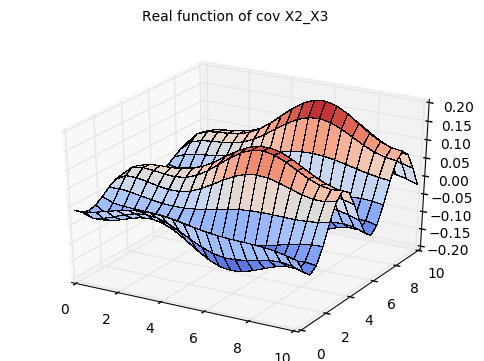

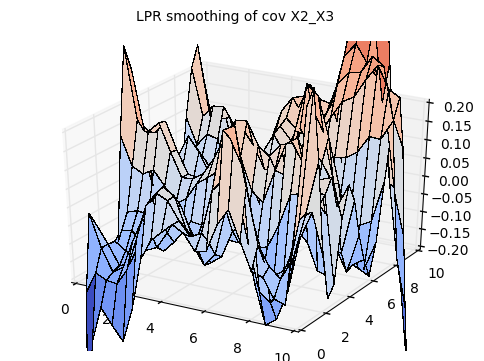

In [49]:
Plotting.Plot_Cov_XY(time_grid_X = X2_data.time_grid,
                     time_grid_Y = X3_data.time_grid,
                     X_real_val_on_grid = X2_data.real_val_on_grid,
                     Y_real_val_on_grid = X3_data.real_val_on_grid,
                     X_mean = X2_Mean_Func(X2_data.time_grid), 
                     Y_mean = X3_Mean_Func(X3_data.time_grid), 
                     fitted_cov = fit_cov_X2_X3, 
                     name_of_XY = 'X2_X3', 
                     z_lim = np.array([-0.2, 0.2]))

In [50]:
'''
Coefficient Function
'''

'\nCoefficient Function\n'

In [51]:
#==========================================
# Get Block_cov_XX (combine all cov_Xi_Xj)
#==========================================


block_cov_XX = np.bmat([[result_X1.cov_fun, fit_cov_X1_X2, fit_cov_X1_X3],
                        [fit_cov_X1_X2.T, result_X2.cov_fun, fit_cov_X2_X3],
                        [fit_cov_X1_X3.T, fit_cov_X2_X3.T, result_X3.cov_fun]])



In [52]:
real_block_cov_XX = FFReg.Real_Block_Cov_XX(list_time_grid_X = (X1_data.time_grid, 
                                                              X2_data.time_grid, 
                                                              X3_data.time_grid),
                                          list_X_real_val_on_grid = (X1_data.real_val_on_grid,
                                                                     X2_data.real_val_on_grid,
                                                                     X3_data.real_val_on_grid),
                                          list_X_Mean_Func = (X1_Mean_Func, 
                                                              X2_Mean_Func, 
                                                              X3_Mean_Func))

[ 0 21]


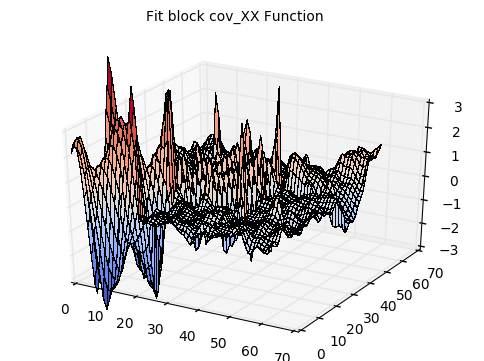

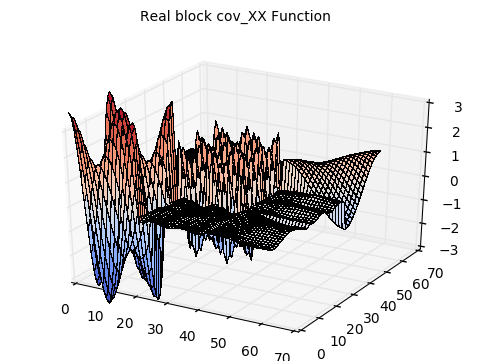

In [53]:
Plotting.Compare_Fit_and_Real(fit = block_cov_XX,
                              real = real_block_cov_XX,
                              name = 'block cov_XX Function',
                              z_lim = np.array([-3, 3]))

In [54]:
inv_block_cov_XX = np.linalg.pinv(block_cov_XX, rcond= 0.1)
inv_real_block_cov_XX = np.linalg.pinv(real_block_cov_XX, rcond= 0.1)

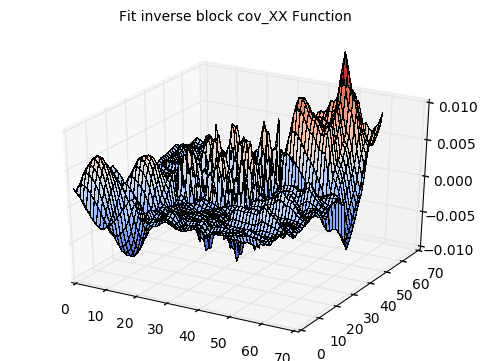

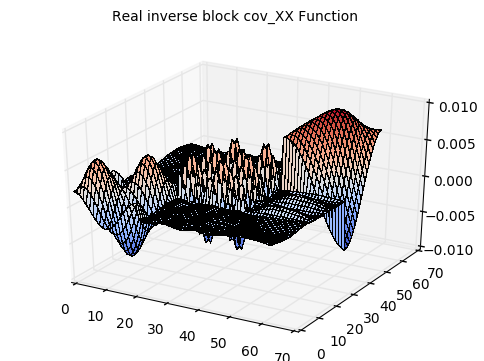

In [55]:
Plotting.Compare_Fit_and_Real(fit = inv_block_cov_XX,
                              real = inv_real_block_cov_XX,
                              name = 'inverse block cov_XX Function',
                              z_lim = np.array([-0.01, 0.01]))

In [56]:
#==========================================
# Get Block_cov_XY (combine all cov_Xi_Yj)
#==========================================

block_cov_XY = np.bmat([[fit_cov_X1_Y], [fit_cov_X2_Y], [fit_cov_X3_Y]])

In [57]:
real_block_cov_XY = FFReg.Real_Block_Cov_XY(list_time_grid_X = (X1_data.time_grid, 
                                                          X2_data.time_grid,
                                                          X3_data.time_grid),
                                      list_time_grid_Y = [ Y_data.time_grid],
                                      list_X_real_val_on_grid = (X1_data.real_val_on_grid,
                                                                 X2_data.real_val_on_grid,
                                                                 X3_data.real_val_on_grid),
                                      list_Y_real_val_on_grid = [ Y_data.real_val_on_grid],
                                      list_X_Mean_Func = (X1_Mean_Func,
                                                          X2_Mean_Func,
                                                          X3_Mean_Func),
                                      list_Y_Mean_Func = [ Y_Mean_Func])

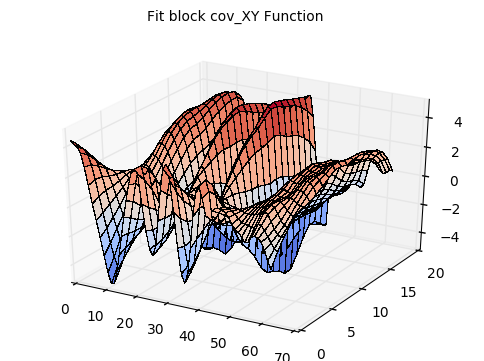

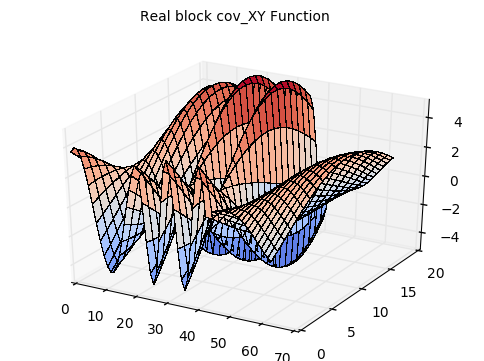

In [58]:
Plotting.Compare_Fit_and_Real(fit = block_cov_XY,
                             real = real_block_cov_XY,
                             name = 'block cov_XY Function',
                             z_lim = np.array([-5, 5]))

In [59]:
# -----------------------------
# Compute Coefficient Function
# -----------------------------

fit_Beta_without_delta =  np.matmul(inv_block_cov_XX,block_cov_XY)

## add delta
delta = np.diag(np.repeat([X1_data.time_grid[1] - X1_data.time_grid[0],
                           X2_data.time_grid[1] - X2_data.time_grid[0],
                           X3_data.time_grid[1] - X3_data.time_grid[0]],
                           [num_grid_X1, num_grid_X2, num_grid_X3]))

delta_inv = np.linalg.inv(delta)
fit_Beta  = np.matmul(delta_inv, fit_Beta_without_delta)

In [60]:
# -----------------------------
# Real Coefficient Function
# -----------------------------
B_total = np.bmat([[B_1], [B_2], [B_3]])

real_block_eig_fun_X = FFReg.Real_Block_Eigen_Func(list_Eigen_Func = (Eigen_Funcs_X1, 
                                                                      Eigen_Funcs_X2, 
                                                                      Eigen_Funcs_X3),
                                                   list_time_grid = (X1_data.time_grid, 
                                                                     X2_data.time_grid,
                                                                     X3_data.time_grid))

real_block_eig_fun_Y = FFReg.Real_Block_Eigen_Func(list_Eigen_Func = [Eigen_Funcs_Y],
                                                   list_time_grid = [Y_data.time_grid])

Real_coef_fun = np.matmul(np.matmul(real_block_eig_fun_X.T, B_total), 
                          real_block_eig_fun_Y)





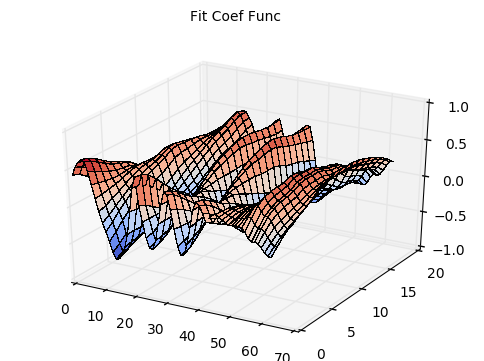

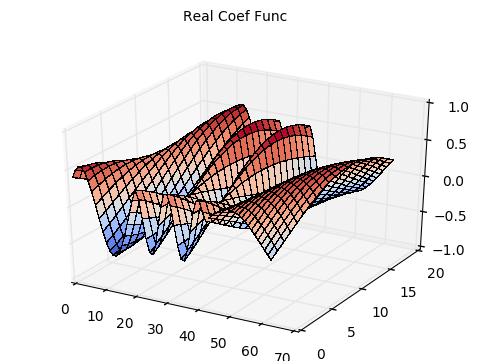

In [61]:
Plotting.Compare_Fit_and_Real(fit = fit_Beta,
                              real = Real_coef_fun,
                              name = "Coef Func",
                              z_lim = [-1, 1])

In [62]:
'''
1. Fit the Response on grid pts (for both training Y and test Y)
2. Plot the Result
'''

'\n1. Fit the Response on grid pts (for both training Y and test Y)\n2. Plot the Result\n'

In [63]:
#---------------------------------------
# fit Response of training set on grid
#---------------------------------------

fit_train_X_center = np.bmat([fit_train_X1 - result_X1.mean_fun,
                             fit_train_X2 - result_X2.mean_fun,
                             fit_train_X3 - result_X3.mean_fun])

In [64]:
#compute test_Y(on grid pts)
fit_train_Y = result_Y.mean_fun + np.matmul(fit_Beta_without_delta.T, fit_train_X_center.T).T

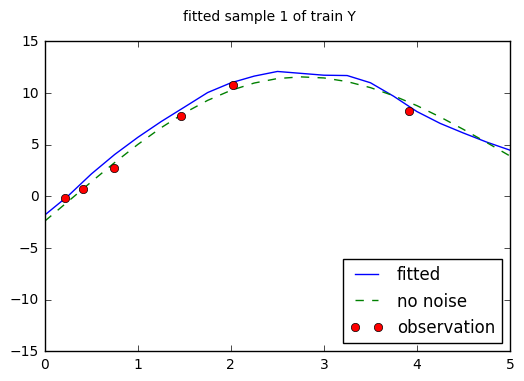

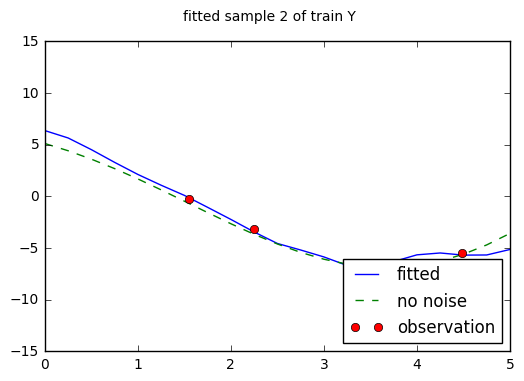

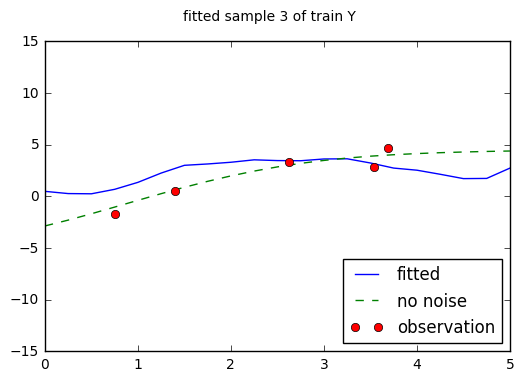

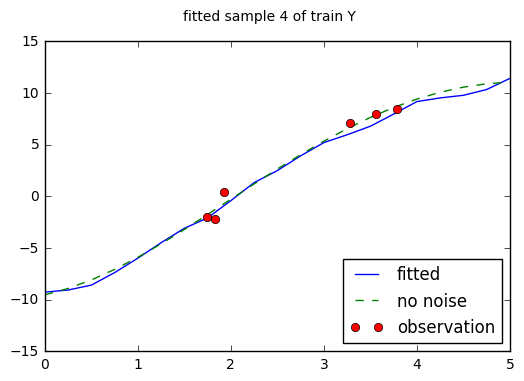

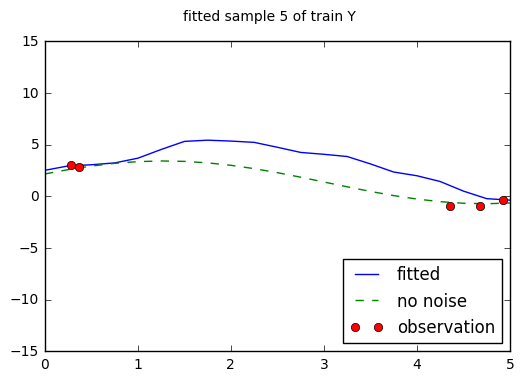

In [75]:
Plotting.Plot_Restruct_Funcs(fit_X = np.asarray(fit_train_Y),
                             real_X= Y_data.real_val_on_grid[: tran_samp_size],
                             time_grid = Y_data.time_grid,
                             obs_X= Y_data.obs_tran,
                             obs_time=Y_data.tran_time_pts,
                             name='train Y',
                             num_plot= 5,
                             y_lim= [-15,15])

In [66]:
#---------------------------------------
# fit Response of test set on grid
#---------------------------------------
fit_test_X_center = np.bmat([fit_test_X1 - result_X1.mean_fun,
                             fit_test_X2 - result_X2.mean_fun,
                             fit_test_X3 - result_X3.mean_fun])

In [67]:
#compute test_Y(on grid pts)
fit_test_Y = result_Y.mean_fun + np.matmul(fit_Beta_without_delta.T, fit_test_X_center.T).T

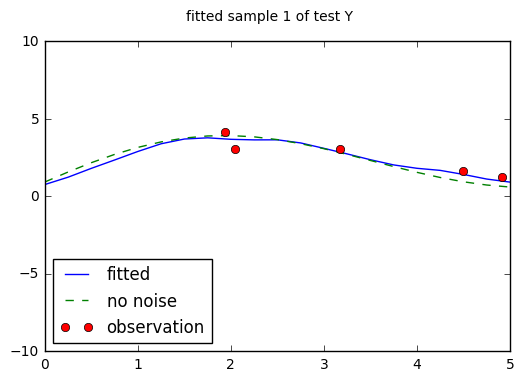

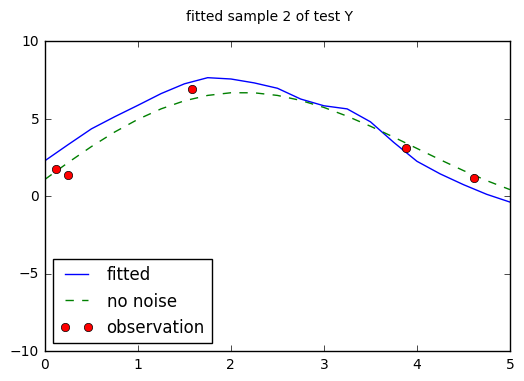

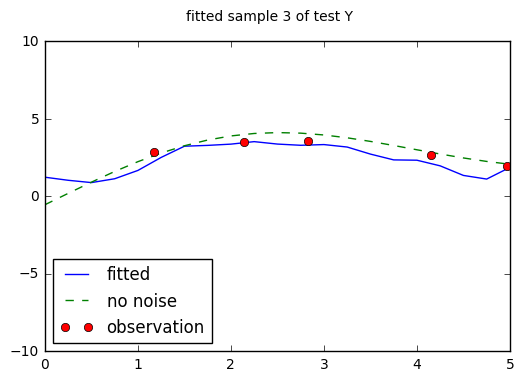

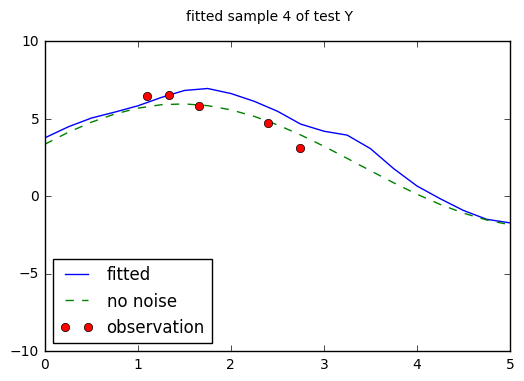

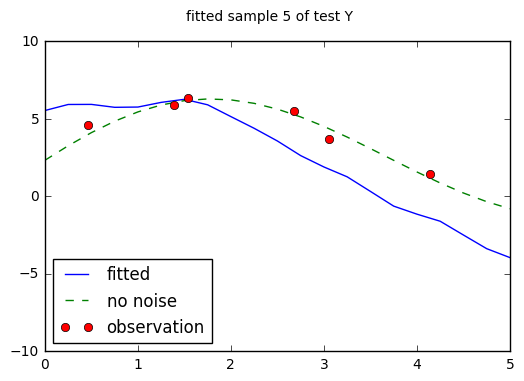

In [68]:
Plotting.Plot_Restruct_Funcs(fit_X = np.asarray(fit_test_Y),
                             real_X= Y_data.real_val_on_grid[tran_samp_size:],
                             time_grid = Y_data.time_grid,
                             obs_X= Y_data.obs_test,
                             obs_time=Y_data.test_time_pts,
                             name='test Y',
                             num_plot= 5,
                             y_lim= [-10,10]
                             ,legend_location = 3)

In [69]:
#real value of test_Y (on grid pts)
real_test_Y = Y_data.real_val_on_grid[tran_samp_size:,:]

In [70]:
#========================================================
#compute RMSPE (relative mean squared prediction error)
#========================================================

(np.square(real_test_Y - fit_test_Y)).sum() /(real_test_Y**2).sum() / test_samp_size

9.643112334037574e-05

In [71]:
#======================================
#compute Mean integrated squared error
#======================================

np.sum(np.square(real_test_Y - fit_test_Y) * (Y_data.time_grid[1] - Y_data.time_grid[0]), 1).mean()

10.984017841740629

In [72]:
# maxima of absolute error
np.abs(real_test_Y - fit_test_Y).max()

6.8445195689719274

In [73]:
# percentile of square error

np.percentile(np.square(real_test_Y - fit_test_Y),[80, 90, 96, 99, 100])

array([  3.25976828,   5.70976766,   9.15933318,  16.08997846,  46.84744813])